In [20]:
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

## Basic interact

In [21]:
def f(x):
    return x

When you pass this function as the first argument to interact along with an integer keyword argument (x=10), a slider is generated and bound to the function parameter.

In [22]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

When you move the slider, the function is called, and its return value is printed.

If you pass True or False, interact will generate a checkbox:

In [23]:
interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

If you pass a string, interact will generate a text box.

In [24]:
interact(f, x='Hi there!');

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

interact also works with functions that have multiple arguments.

In [25]:
@interact(x=2, y=1.0)
def g(x, y):
    return (x, y)

interactive(children=(IntSlider(value=2, description='x', max=6, min=-2), FloatSlider(value=1.0, description='…

## Fixing arguments using fixed

In [26]:
def h(p, q):
    return (p, q)

When we call interact, we pass fixed(20) for q to hold it fixed at a value of 20.

In [27]:
interact(h, p=5, q=fixed(20));

interactive(children=(IntSlider(value=5, description='p', max=15, min=-5), Output()), _dom_classes=('widget-in…

## Widget abbreviations

When you pass an integer-valued keyword argument of 10 (x=10) to interact, it generates an integer-valued slider control with a range of [-10,+3*10]. In this case, 10 is an abbreviation for an actual slider widget:

IntSlider(min=-10, max=30, step=1, value=10)

we can get the same result if we pass this IntSlider as the keyword argument for x:

In [29]:
interact(f, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

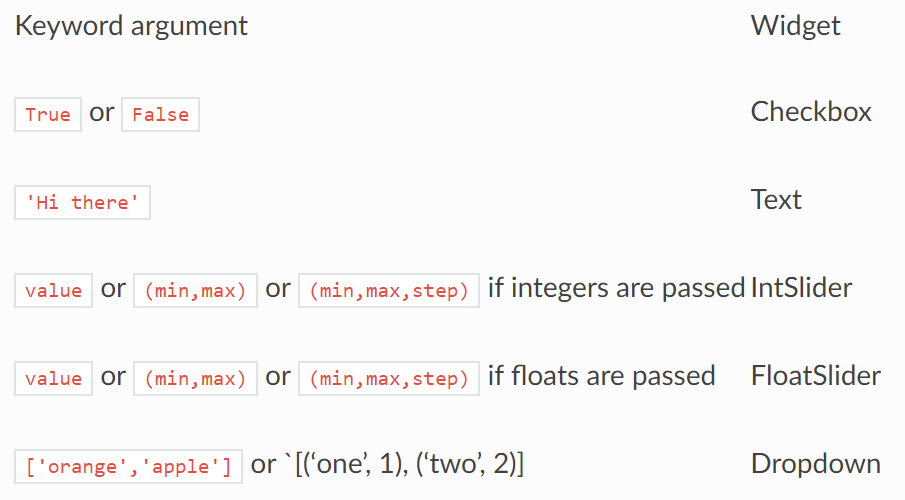

In [30]:
interact(f, x=(0,4));

interactive(children=(IntSlider(value=2, description='x', max=4), Output()), _dom_classes=('widget-interact',)…

If a 3-tuple of integers is passed (min,max,step), the step size can also be set.

In [31]:
interact(f, x=(0,8,2));

interactive(children=(IntSlider(value=4, description='x', max=8, step=2), Output()), _dom_classes=('widget-int…

A float-valued slider is produced if any of the elements of the tuples are floats. Here the minimum is 0.0, the maximum is 10.0 and step size is 0.1 (the default).

In [32]:
interact(f, x=(0.0,10.0));

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0), Output()), _dom_classes=('widget-inte…

In [34]:
interact(f, x=(0.0,10.0,0.5));

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.5), Output()), _dom_classes=('w…

In [35]:
interact(f, x=['apples','oranges']);

interactive(children=(Dropdown(description='x', options=('apples', 'oranges'), value='apples'), Output()), _do…

If you want a dropdown menu that passes non-string values to the Python function, you can pass a list of ('label', value) pairs. The first items are the names in the dropdown menu UI and the second items are values that are the arguments passed to the underlying Python function.

In [36]:
interact(f, x=[('one', 10), ('two', 20)]);

interactive(children=(Dropdown(description='x', options=(('one', 10), ('two', 20)), value=10), Output()), _dom…

## interactive

In addition to interact, IPython provides another function, interactive, that is useful when you want to reuse the widgets that are produced or access the data that is bound to the UI controls.

Note that unlike interact, the return value of the function will not be displayed automatically, but you can display a value inside the function with IPython.display.display.

In [37]:
from IPython.display import display

def f(a, b):
    display(a + b)
    return a+b

Unlike interact, interactive returns a Widget instance rather than immediately displaying the widget.

In [38]:
w = interactive(f, a=10, b=20)

In [39]:
type(w)

ipywidgets.widgets.interaction.interactive

In [40]:
w.children

(IntSlider(value=10, description='a', max=30, min=-10),
 IntSlider(value=20, description='b', max=60, min=-20),
 Output())

In [41]:
display(w)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

In [42]:
w.kwargs

{'a': 15, 'b': 29}

In [43]:
w.result

44

## Disabling continuous updates

In [71]:
def palin_list_comp(num):
    arr = list(x for x in range(int(num)) if str(x) == str(x)[::-1] and str(x**2) == str(x**2)[::-1])
    return arr

In [80]:
def palin(num):
    arr = []
    
    for each_num in range(int(num)):
        if str(each_num) == str(each_num)[::-1] and str(each_num**2) == str(each_num**2)[::-1]:
            arr.append(each_num)
    return arr

In [81]:
%%time
palin(1000)

Wall time: 999 µs


[0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212]

In [82]:
%%time
palin_list_comp(1000)

Wall time: 1e+03 µs


[0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212]

In [83]:
from ipywidgets import FloatSlider

In [86]:
interact(palin, num=FloatSlider(min=100, max=1000, step=1));

interactive(children=(FloatSlider(value=100.0, description='num', max=1000.0, min=100.0, step=1.0), Output()),…

Notice that the output is updated even while dragging the mouse on the slider. This is not useful for long running functions due to lagging:

There are two ways to mitigate this. You can either only execute on demand, or restrict execution to mouse release events.

## interact_manual
The interact_manual function provides a variant of interaction that allows you to restrict execution so it is only done on demand. 

A button is added to the interact controls that allows you to trigger an execute event.

In [87]:
interact_manual(palin, num=FloatSlider(min=100, max=1000, step=1));

interactive(children=(FloatSlider(value=100.0, description='num', max=1000.0, min=100.0, step=1.0), Button(des…

You can do the same thing with interactive by using a dict as the second argument,

In [97]:
slow = interactive(palin, {'manual': True}, num=widgets.FloatSlider(min=100, max=10000, step=10))
slow

interactive(children=(FloatSlider(value=100.0, description='num', max=10000.0, min=100.0, step=10.0), Button(d…

In [98]:
slow.result

[0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111]

In [99]:
slow.kwargs

{'num': 1730.0}

## continuous_update

If you are using slider widgets, you can set the continuous_update kwarg to False. continuous_update is a kwarg of slider widgets that restricts executions to mouse release events.

In [102]:
interact(palin, num=FloatSlider(min=100, max=10000, step=1, continuous_update=False));

interactive(children=(FloatSlider(value=100.0, continuous_update=False, description='num', max=10000.0, min=10…

## More control over the user interface: interactive_output
interactive_output provides additional flexibility: you can control how the UI elements are laid out.

Unlike interact, interactive, and interact_manual, __interactive_output__ does not generate a user interface for the widgets. 

This is powerful, because it means you can create a widget, put it in a box, and then pass the widget to interactive_output, and have control over the widget and its layout.

In [103]:
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()

In [104]:
ui = widgets.HBox([a, b, c])

In [105]:
def f(a, b, c):
    print((a, b, c))

In [106]:
out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

In [107]:
display(ui, out)

Output(outputs=({'name': 'stdout', 'text': '(0, 0, 0)\n', 'output_type': 'stream'},))

## Arguments that are dependent on each other
Arguments that are dependent on each other can be expressed manually using observe. See the following example, where one variable is used to describe the bounds of another.

In [112]:
x_widget = FloatSlider(min=0.0, max=10.0, step=1)
y_widget = FloatSlider(min=0.0, max=10.0, step=1, value=5.0)

In [119]:
def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value

y_widget.observe(update_x_range, 'value')

In [120]:
def printer(x, y):
    print(x, y)

In [121]:
interact(printer, x=x_widget, y=y_widget);

interactive(children=(FloatSlider(value=0.0, description='x', max=2.0, step=1.0), FloatSlider(value=1.0, descr…

## Widgets

In [133]:
w = widgets.IntSlider(min=1, max=100000)
display(w)

IntSlider(value=1, max=100000, min=1)

In [134]:
w.value

24718

Similarly, to set a widget’s value, you can set its value property.

In [135]:
w.value = 1000

## Keys
In addition to value, most widgets share keys, description, and disabled. To see the entire list of synchronized, stateful properties of any specific widget, you can query the keys property.

In [136]:
w.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [137]:
widgets.Text(value='Hello World!', disabled=True)

Text(value='Hello World!', disabled=True)

## Linking two similar widgets
If you need to display the same value two different ways, you’ll have to use two different widgets.

In [138]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

FloatText(value=0.0)

FloatSlider(value=0.0)

In [139]:
mylink = widgets.jslink((a, 'value'), (b, 'value'))

## Widget List

In [140]:
import ipywidgets as widgets

In [142]:
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Rating : ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider(value=7, continuous_update=False, description='Rating : ', max=10)

In [143]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, readout_format='.1f')

In [144]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, orientation='vertical', readout…

In [145]:
widgets.FloatLogSlider(
    value=10,
    base=10,
    min=-10, # max exponent of base
    max=10, # min exponent of base
    step=0.2, # exponent step
    description='Log Slider'
)

FloatLogSlider(value=10.0, description='Log Slider', max=10.0, min=-10.0, step=0.2)

In [146]:
widgets.IntRangeSlider(
    value=[5, 7],
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

IntRangeSlider(value=(5, 7), continuous_update=False, description='Test:', max=10)

In [147]:
widgets.FloatRangeSlider(
    value=[5, 7.5],
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatRangeSlider(value=(5.0, 7.5), continuous_update=False, description='Test:', max=10.0, readout_format='.1f…

In [148]:
widgets.IntProgress(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

IntProgress(value=7, description='Loading:', max=10)

In [149]:
widgets.FloatProgress(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Loading:',
    bar_style='info',
    orientation='horizontal'
)

FloatProgress(value=7.5, bar_style='info', description='Loading:', max=10.0)

In [150]:
widgets.BoundedIntText(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Text:',
    disabled=False
)

BoundedIntText(value=7, description='Text:', max=10)

In [151]:
widgets.BoundedFloatText(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Text:',
    disabled=False
)

BoundedFloatText(value=7.5, description='Text:', max=10.0, step=0.1)

In [152]:
widgets.IntText(
    value=7,
    description='Any:',
    disabled=False
)

IntText(value=7, description='Any:')

In [153]:
widgets.FloatText(
    value=7.5,
    description='Any:',
    disabled=False
)

FloatText(value=7.5, description='Any:')

## Boolean widgets

In [154]:
widgets.ToggleButton(
    value=False,
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

ToggleButton(value=False, description='Click me', icon='check', tooltip='Description')

Checkbox

value specifies the value of the checkbox

indent parameter places an indented checkbox, aligned with other controls. Options are True (default) or False

In [155]:
widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False,
    indent=False
)

Checkbox(value=False, description='Check me', indent=False)

In [160]:
widgets.Valid(
    value=True,
    description='Transaction!',
)

Valid(value=True, description='Transaction!')

## Selection widgets

In [161]:
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

In [162]:
widgets.Dropdown(
    options=[('One', 1), ('Two', 2), ('Three', 3)],
    value=2,
    description='Number:',
)

Dropdown(description='Number:', index=1, options=(('One', 1), ('Two', 2), ('Three', 3)), value=2)

In [164]:
widgets.RadioButtons(
    options=['Data Science', 'Machine Learning', 'Deep Learning'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Pizza topping:',
    disabled=False
)

RadioButtons(description='Pizza topping:', options=('Data Science', 'Machine Learning', 'Deep Learning'), valu…

In [165]:
widgets.Box(
    [
        widgets.Label(value='Pizza topping with a very long label:'),
        widgets.RadioButtons(
            options=[
                'pepperoni',
                'pineapple',
                'anchovies',
                'and the long name that will fit fine and the long name that will fit fine and the long name that will fit fine '
            ],
            layout={'width': 'max-content'}
        )
    ]
)

Box(children=(Label(value='Pizza topping with a very long label:'), RadioButtons(layout=Layout(width='max-cont…

In [166]:
widgets.Select(
    options=['Linux', 'Windows', 'OSX'],
    value='OSX',
    # rows=10,
    description='OS:',
    disabled=False
)

Select(description='OS:', index=2, options=('Linux', 'Windows', 'OSX'), value='OSX')

In [167]:
widgets.SelectionSlider(
    options=['scrambled', 'sunny side up', 'poached', 'over easy'],
    value='sunny side up',
    description='I like my eggs ...',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

SelectionSlider(continuous_update=False, description='I like my eggs ...', index=1, options=('scrambled', 'sun…

In [169]:
import datetime
dates = [datetime.date(2015, i, 1) for i in range(1, 13)]
options = [(i.strftime('%b'), i) for i in dates]

widgets.SelectionRangeSlider(
    options=options,
    index=(0, 11),
    description='Months (2015)',
    disabled=False
)


SelectionRangeSlider(description='Months (2015)', index=(0, 11), options=(('Jan', datetime.date(2015, 1, 1)), …

In [170]:
widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)

ToggleButtons(description='Speed:', options=('Slow', 'Regular', 'Fast'), tooltips=('Description of slow', 'Des…

In [171]:
widgets.SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    #rows=10,
    description='Fruits',
    disabled=False
)

SelectMultiple(description='Fruits', index=(1,), options=('Apples', 'Oranges', 'Pears'), value=('Oranges',))

## String widgets

There are several widgets that can be used to display a string value. 

The Text, Textarea, and Combobox widgets accept input. The HTML and HTMLMath widgets display a string as HTML (HTMLMath also renders math). 

The Label widget can be used to construct a custom control labe

In [172]:
widgets.Text(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

Text(value='Hello World', description='String:', placeholder='Type something')

In [173]:
widgets.Textarea(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

Textarea(value='Hello World', description='String:', placeholder='Type something')

In [174]:
widgets.Combobox(
    # value='John',
    placeholder='Choose Someone',
    options=['Paul', 'John', 'George', 'Ringo'],
    description='Combobox:',
    ensure_option=True,
    disabled=False
)

Combobox(value='', description='Combobox:', ensure_option=True, options=('Paul', 'John', 'George', 'Ringo'), p…

In [175]:
widgets.HBox([widgets.Label(value="The $m$ in $E=mc^2$:"), widgets.FloatSlider()])

In [176]:
file = open(r"E:\MYLEARN\2-ANALYTICS-DataScience\icons-images\pagerank5.PNG", "rb")

image = file.read()

widgets.Image(
    value=image,
    format='png',
    width=300,
    height=400,
)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01y\x00\x00\x01G\x08\x06\x00\x00\x00Ds<\xe0\x00\x00…

In [177]:
widgets.Button(
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

Button(description='Click me', icon='check', style=ButtonStyle(), tooltip='Click me')

## Play (Animation) widget
The Play widget is useful to perform animations by iterating on a sequence of integers with a certain speed. The value of the slider below is linked to the player.

In [178]:
play = widgets.Play(
    value=50,
    min=0,
    max=100,
    step=1,
    interval=500,
    description="Press play",
    disabled=False
)

slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

In [179]:
widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

DatePicker(value=None, description='Pick a Date')

In [180]:
widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

ColorPicker(value='blue', description='Pick a color')

## Output widgets: leveraging Jupyter’s display system

In [181]:
import ipywidgets as widgets

The Output widget can capture and display stdout, stderr and rich output generated by IPython. You can also append output directly to an output widget, or clear it programmatically.

In [182]:
out = widgets.Output(layout={'border': '1px solid black'})
out

Output(layout=Layout(border='1px solid black'))